In [1]:
import numpy as np
import matplotlib.pyplot as pp
import scipy.io.wavfile as wav
from scipy.fft import fft, ifft, fftfreq

In [2]:
sr,x = wav.read("string_example.wav")
print(sr)
print(x[:20])

44100
[-91 -93 -90 -93 -91 -91 -93 -90 -94 -89 -94 -89 -94 -90 -93 -91 -90 -95
 -87 -96]


(0.0, 10000.0)

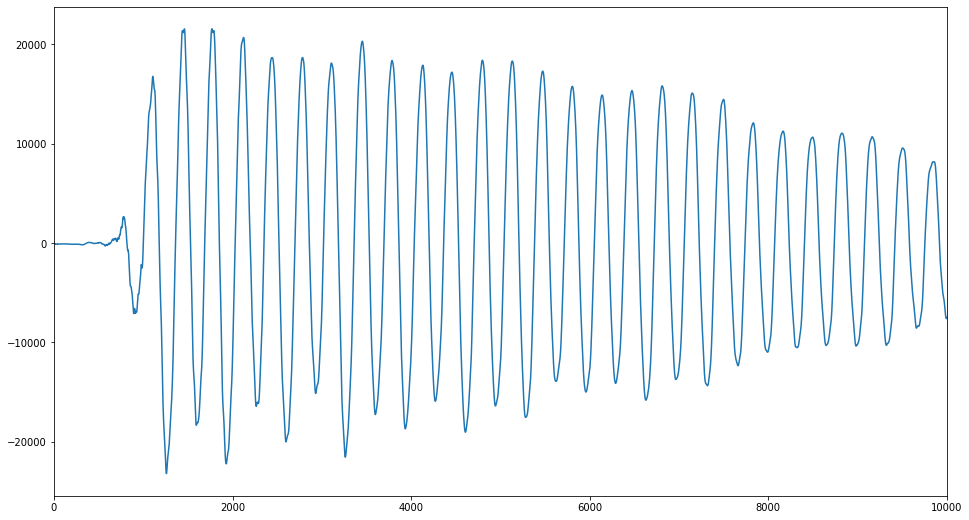

In [3]:
pp.figure(figsize=(16,9))
pp.plot(x)
pp.xlim([0,10000])

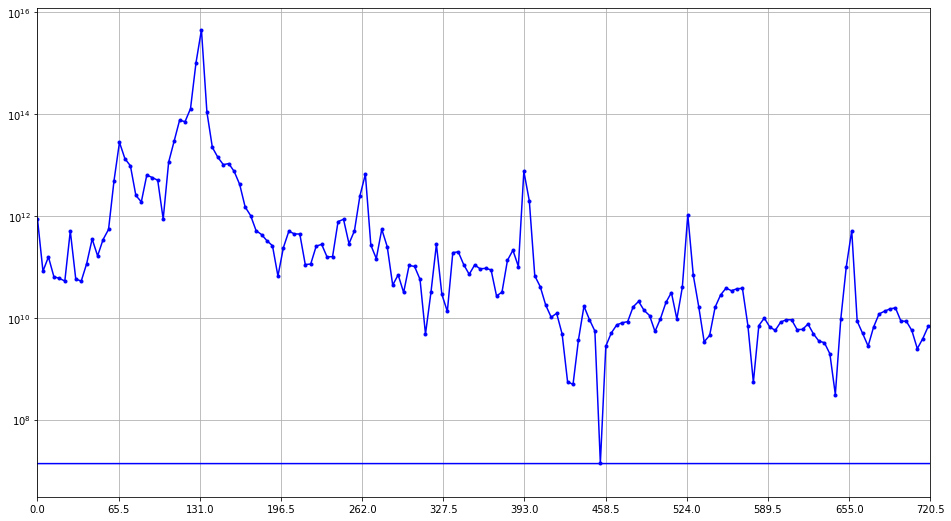

In [13]:
subx = x[:10000]
y = fft(subx)
f = fftfreq(len(subx), 1/sr)
pp.figure(figsize=(16,9))
pp.plot(f,abs(y**2), 'b.-')
pp.yscale("log")
pp.xlim([0,500])
pp.xticks(np.arange(12)*131/2)
pp.grid()

How to do playback from within python... it's a little bit of a pain, since you have to handle data type conversion and memory layout. If you really want to see it, I've got some code below, but I don't really recommend it since it's easy to run into weird problems.

In [60]:
import pyaudio
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paInt16, channels=1, rate=sr, output=True)

In [90]:
stream.write(x)

In [99]:
z = np.real(ifft(fft(x))).astype("int16")

In [107]:
w = np.ascontiguousarray(z[::2])

In [109]:
stream.write(w)

What's easier is just to write the output to a file and then play it using some other application

In [5]:
sr = 44100
t = np.arange(0,2,1/sr)
w = 0.5 * np.sin(2*np.pi*250*t)
wav.write("test.wav", sr, w)

In [6]:
w = np.random.rand(len(t))
wav.write("test.wav", sr, w)

In [7]:
w = np.random.rand(len(t))
z = fft(w)
f = fftfreq(len(w), 1/sr)
z[(f > 660) | (f < 440)] = 0
w = np.real(ifft(z))
wav.write("test.wav", sr, w)

Or using the sample from above

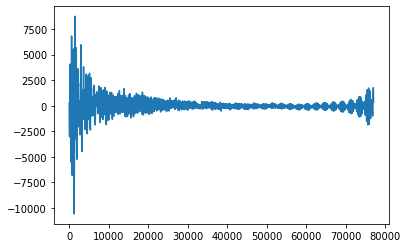

In [30]:
sr,x = wav.read("string_example.wav")
y = fft(x)
f = fftfreq(len(x), 1/sr)
# remove odd harmonics
for fn in range(131, 4000, 262):
    y[(abs(f) > fn-10) & (abs(f) < fn+10)] = 0
z = np.real(ifft(y))
pp.plot(z)
wav.write("test.wav", sr, z.astype('int16'))